In [48]:
import pandas as pd
import numpy as np

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import seaborn as sns

In [51]:
df =pd.read_excel('Laser.xlsx')
df.head()

,Std,Run,Laser power [W],Cutting speed [m/min],Focal position [mm],Gas pressure [bar],Rz [µm],Ra [µm],MRR,DD [%]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[mm3/min],NaN
1,1.0,11.0,1500.0,1.0,-2.5,13.0,3.69,0.74,2020.3,1.0264
2,2.0,24.0,2500.0,1.0,-2.5,13.0,2.21,0.43,2367.81,1.0268
3,3.0,28.0,1500.0,3.0,-2.5,13.0,2.36,0.47,5353.33,1.5244
4,4.0,6.0,2500.0,3.0,-2.5,13.0,3.40,0.76,6189.06,0.9088


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Std                    29 non-null     float64
 1   Run                    29 non-null     float64
 2   Laser power [W]        29 non-null     float64
 3   Cutting speed [m/min]  29 non-null     float64
 4   Focal position [mm]    29 non-null     float64
 5   Gas pressure [bar]     29 non-null     float64
 6   Rz [µm]                29 non-null     float64
 7   Ra [µm]                29 non-null     float64
 8   MRR                    30 non-null     object 
 9   DD [%]                 29 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.5+ KB


In [53]:
df.dropna(inplace=True)
df.head()

,Std,Run,Laser power [W],Cutting speed [m/min],Focal position [mm],Gas pressure [bar],Rz [µm],Ra [µm],MRR,DD [%]
1,1.0,11.0,1500.0,1.0,-2.5,13.0,3.69,0.74,2020.3,1.0264
2,2.0,24.0,2500.0,1.0,-2.5,13.0,2.21,0.43,2367.81,1.0268
3,3.0,28.0,1500.0,3.0,-2.5,13.0,2.36,0.47,5353.33,1.5244
4,4.0,6.0,2500.0,3.0,-2.5,13.0,3.40,0.76,6189.06,0.9088
5,5.0,14.0,2000.0,2.0,-3.5,10.0,4.74,0.93,4539.1,1.6582


In [54]:
df.describe()

,Std,Run,Laser power [W],Cutting speed [m/min],Focal position [mm],Gas pressure [bar],Rz [µm],Ra [µm],DD [%]
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,15.000000,2000.000000,2.000000,-2.500000,13.000000,3.394828,0.688966,1.180128
std,8.514693,8.514693,327.326835,0.654654,0.654654,1.963961,0.828793,0.171034,0.262994
min,1.000000,1.000000,1500.000000,1.000000,-3.500000,10.000000,2.210000,0.430000,0.735100
25%,8.000000,8.000000,2000.000000,2.000000,-2.500000,13.000000,2.790000,0.570000,0.994500
50%,15.000000,15.000000,2000.000000,2.000000,-2.500000,13.000000,3.210000,0.660000,1.058200
75%,22.000000,22.000000,2000.000000,2.000000,-2.500000,13.000000,3.890000,0.820000,1.344500
max,29.000000,29.000000,2500.000000,3.000000,-1.500000,16.000000,4.980000,1.030000,1.914200


# PLOTS TO CHECK OUT THE DATA

C:\Users\stukg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


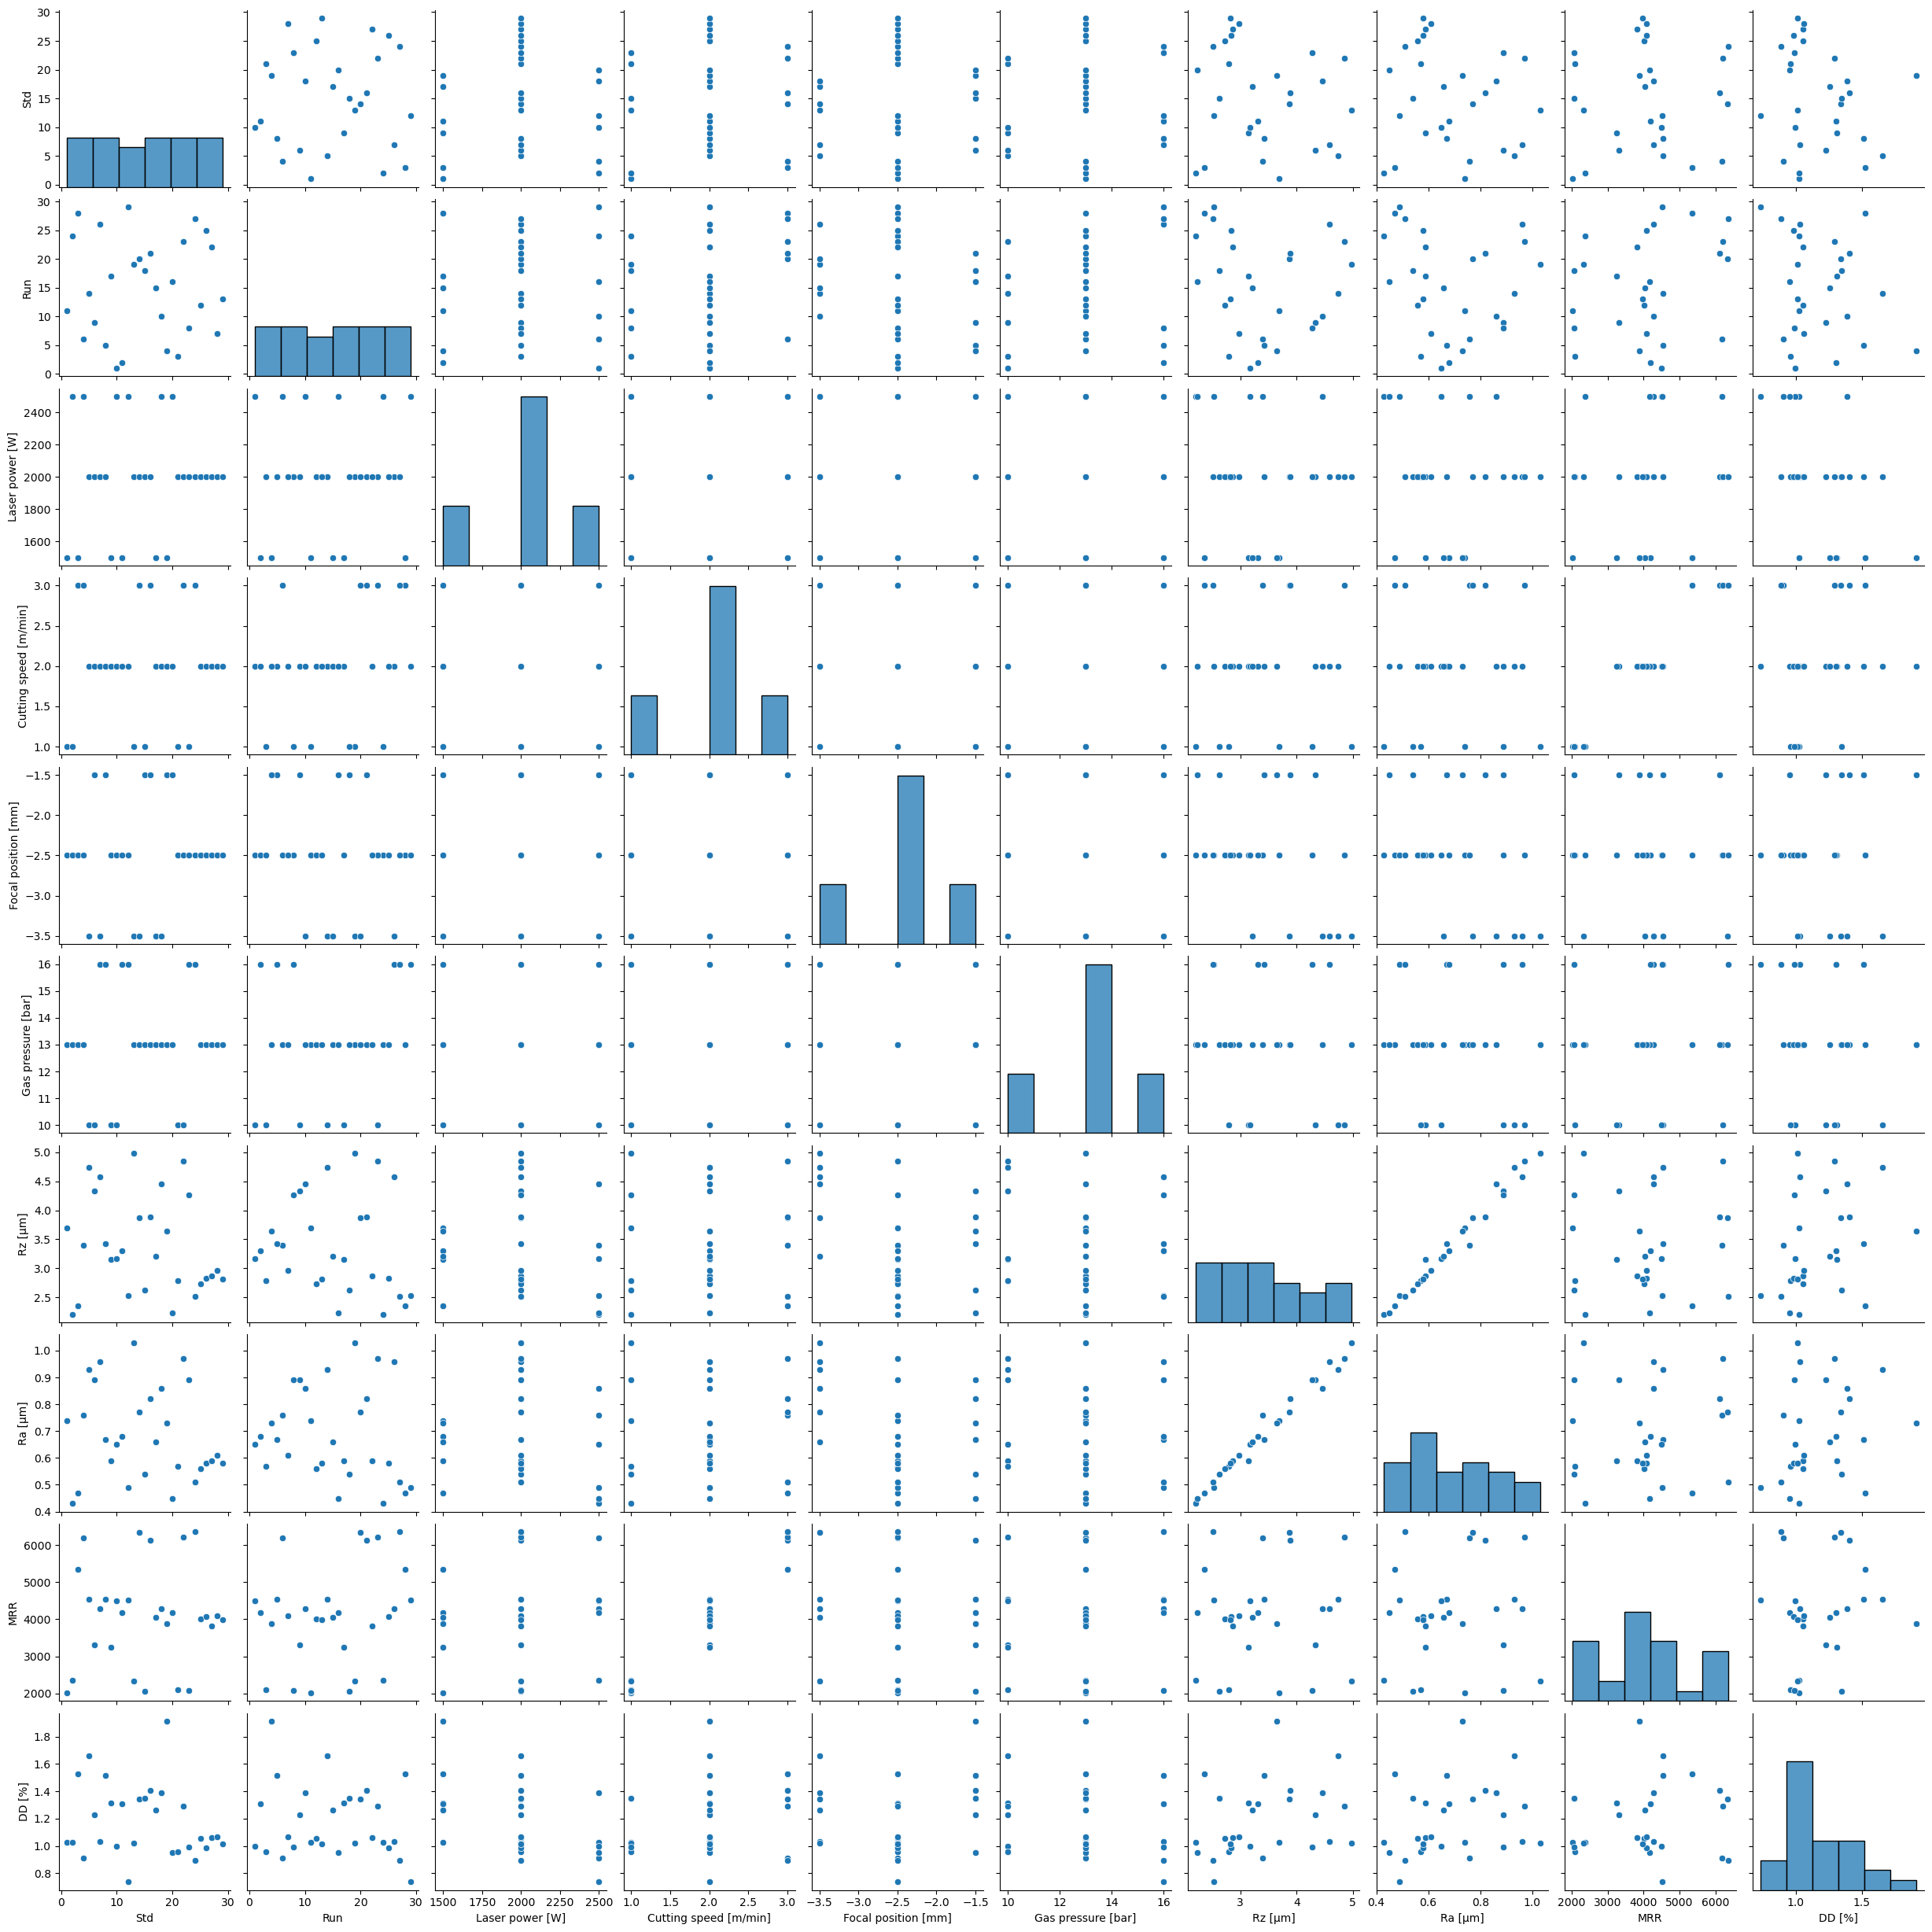

In [57]:
sns.pairplot(df)

C:\Users\stukg\AppData\Local\Temp\ipykernel_137824\4102333518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ra [µm]'])


<Axes: xlabel='Ra [µm]', ylabel='Density'>

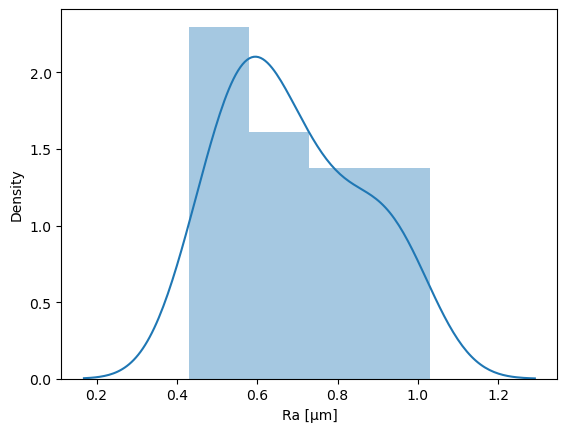

In [58]:
#check the distribution of what Ra - this is what I want to predict
sns.distplot(df['Ra [µm]'])

In [59]:
df.columns

Index(['Std', 'Run', 'Laser power [W]', 'Cutting speed [m/min]',
       'Focal position [mm]', 'Gas pressure [bar]', 'Rz [µm]', 'Ra [µm]',
       'MRR', 'DD [%]'],
      dtype='object')

In [60]:
X = df[['Laser power [W]', 'Cutting speed [m/min]', 'Focal position [mm]', 'Gas pressure [bar]']]
y= df[ 'Ra [µm]']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
mdl = LinearRegression()

In [66]:
mdl.fit(X_train,y_train)


LinearRegression()

In [67]:
print(mdl.intercept_)

0.8004343123861579


In [69]:
mdl.coef_

array([-7.10382514e-05,  6.26878415e-02, -9.25239071e-02, -2.37864299e-02])

In [72]:
coe = pd.DataFrame(mdl.coef_,X.columns,columns = ['Coefficients'])
coe

,Coefficients
Laser power [W],-0.000071
Cutting speed [m/min],0.062688
Focal position [mm],-0.092524
Gas pressure [bar],-0.023786


# PREDICTIONS

In [73]:
pred = mdl.predict(X_test)

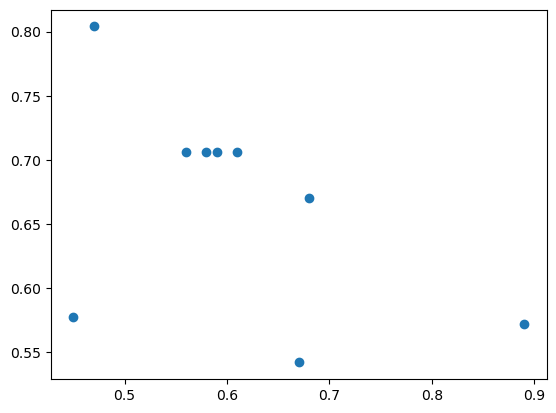

In [74]:
plt.scatter(y_test,pred)

C:\Users\stukg\AppData\Local\Temp\ipykernel_137824\731847810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


<Axes: xlabel='Ra [µm]', ylabel='Density'>

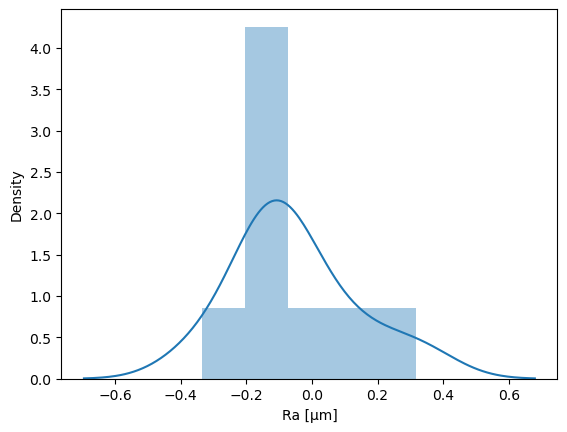

In [75]:
sns.distplot(y_test-pred)

In [76]:
from sklearn import metrics

In [78]:
metrics.mean_absolute_error(y_test,pred)

0.15571038251366115

In [79]:
metrics.mean_squared_error(y_test,pred)

0.033928847811968116

In [80]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

0.1841978496399133

In [81]:
metrics.r2_score(y_test,pred)

-1.247127287628305

# Conclusion

The results we got for our model makes sense. from the graphs above it is clear that the inputs and outputs are not correlated linearly. 
This data needs to be analysed using a different model